如果你使用 Python 语言进行科学计算，那么一定会接触到 NumPy。NumPy 是支持 Python 语言的数值计算扩充库，其拥有强大的多维数组处理与矩阵运算能力。除此之外，NumPy 还内建了大量的函数，方便你快速构建数学模型。  


知识点：
- 数值类型及多维数组
- 数组操作及随机抽样
- 数学函数及代数运算
- 数组索引及其他用法

[<i class="fa fa-external-link-square" aria-hidden="true"> NumPy</i>](https://www.numpy.org/) 的英文全称为 Numerical Python，意味 Python 面向数值计算的第三方库。NumPy 的特点在于，针对 Python 内建的数组类型做了扩充，支持更高维度的数组和矩阵运算，以及更丰富的数学函数。

NumPy 是 Scipy.org 中最重要的库之一，它同时也被 Pandas，Matplotlib 等我们熟知的第三方库作为核心计算库。当你在单独安装这些库时，你会发现同时会安装 NumPy 作为依赖。

### NumPy 数组类型

我们先来了解 NumPy 支持的数据类型。Python 本身支持的数值类型有 int（整型，Python 2 中存在 long 长整型）、float（浮点型）、bool（布尔型） 和 complex（复数型）。

而 NumPy 支持比 Python 本身更为丰富的数值类型，细分如下：

| 类型 | 解释 |
|:----------:|:------------------------------------------------------:|
| bool | 布尔类型，1 个字节，值为 True 或 False。 |
| int | 整数类型，通常为 int64 或 int32 。 |
| intc | 与 C 里的 int 相同，通常为 int32 或 int64。 |
| intp | 用于索引，通常为 int32 或 int64。 |
| int8 | 字节（从 -128 到 127） |
| int16 | 整数（从 -32768 到 32767） |
| int32 | 整数（从 -2147483648 到 2147483647） |
| int64 | 整数（从 -9223372036854775808 到 9223372036854775807） |
| uint8 | 无符号整数（从 0 到 255） |
| uint16 | 无符号整数（从 0 到 65535） |
| uint32 | 无符号整数（从 0 到 4294967295） |
| uint64 | 无符号整数（从 0 到 18446744073709551615） |
| float | float64 的简写。 |
| float16 | 半精度浮点，5 位指数，10 位尾数 |
| float32 | 单精度浮点，8 位指数，23 位尾数 |
| float64 | 双精度浮点，11 位指数，52 位尾数 |
| complex | complex128 的简写。 |
| complex64 | 复数，由两个 32 位浮点表示。 |
| complex128 | 复数，由两个 64 位浮点表示。 |

在 NumPy 中，上面提到的这些数值类型都被归于 `dtype（data-type）` 对象的实例。
我们可以用 `numpy.dtype(object, align, copy)` 来指定数值类型。而在数组里面，可以用 `dtype=` 参数。

In [2]:
import numpy as np  # 导入 NumPy 模块

a = np.array([1.1, 2.2, 3.3], dtype=np.float64)  # 指定 1 维数组的数值类型为 float64
a, a.dtype  # 查看 a 及 dtype 类型

(array([1.1, 2.2, 3.3]), dtype('float64'))

你可以使用 `.astype()` 方法在不同的数值类型之间相互转换。

In [3]:
a.astype(int).dtype  # 将 a 的数值类型从 float64 转换为 int，并查看 dtype 类型

dtype('int32')

### NumPy 数组生成

在 Python 内建对象中，数组有三种形式：  
- 列表：`[1, 2, 3]`
- 元组：`(1, 2, 3, 4, 5)`
- 字典：`{A:1, B:2}`

其中，元组与列表相似，不同之处在于元组的元素不能修改。而字典由键和值构成。python 标准类针对数组的处理局限于 1 维，并仅提供少量的功能。而 NumPy 最核心且最重要的一个特性就是 `ndarray` 多维数组对象，它区别于 Python 的标准类，拥有对高维数组的处理能力，这也是数值计算过程中缺一不可的重要特性。  
NumPy 中，`ndarray` 类具有六个参数，它们分别为：

- `shape`：数组的形状。
- `dtype`：数据类型。
- `buffer`：对象暴露缓冲区接口。
- `offset`：数组数据的偏移量。
- `strides`：数据步长。
- `order`：`{'C'，'F'}`，以行或列为主排列顺序。  

下面，我们来了解创建 NumPy 多维数组的一些方法。在 NumPy 中，我们主要通过以下 5 种途径创建数组，它们分别是：  

- 从 Python 数组结构列表，元组等转换。
- 使用 `np.arange`、`np.ones`、`np.zeros` 等 NumPy 原生方法。
- 从存储空间读取数组。
- 通过使用字符串或缓冲区从原始字节创建数组。
- 使用特殊函数，如 `random`。

#### 列表或元组转换

在 NumPy 中，我们使用 `numpy.array` 将列表或元组转换为 `ndarray` 数组。其方法为：  
```python
numpy.array(object, dtype=None, copy=True, order=None, subok=False, ndmin=0)
```


其中，参数：
 - `object`：列表、元组等。
 - `dtype`：数据类型。如果未给出，则类型为被保存对象所需的最小类型。
 - `copy`：布尔类型，默认 True，表示复制对象。
 - `order`：顺序。
 - `subok`：布尔类型，表示子类是否被传递。
 - `ndmin`：生成的数组应具有的最小维数。

下面，通过列表创建一个 `ndarray` 数组。

In [4]:
np.array([[1, 2, 3], [4, 5, 6]])

array([[1, 2, 3],
       [4, 5, 6]])

或者是列表和元组。

In [5]:
np.array([(1, 2), (3, 4), (5, 6)])

array([[1, 2],
       [3, 4],
       [5, 6]])

#### `arange` 方法创建

除了直接使用 array 方法创建 `ndarray`，在 NumPy 中还有一些方法可以创建一些有规律性的多维数。首先，我们来看一看 `arange()`。`arange()` 的功能是在给定区间内创建一系列均匀间隔的值。方法如下：  

```python
numpy.arange(start, stop, step, dtype=None)
```

你需要先设置值所在的区间 `[开始， 停止)`，这是一个半开半闭区间。然后，在设置 `step` 步长用于设置值之间的间隔。最后的可选参数 `dtype `可以设置返回`ndarray` 的值类型。  
            
               

In [6]:
# 在区间 [3, 7) 中以 0.5 为步长新建数组
np.arange(3, 7, 0.5, dtype='float32')

array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5], dtype=float32)

#### `linspace` 方法创建
`linspace `方法也可以像` arange `方法一样，创建数值有规律的数组。`linspace` 用于在指定的区间内返回间隔均匀的值。其方法如下：
```python
numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
```
- `start`：序列的起始值。
- `stop`：序列的结束值。
- `num`：生成的样本数。默认值为50。
- `endpoint`：布尔值，如果为真，则最后一个样本包含在序列内。
- `retstep`：布尔值，如果为真，返回间距。
- `dtype`：数组的类型。

In [7]:
np.linspace(0, 10, 10, endpoint=True)

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

将 `endpoint` 参数改成 `False` 看看区别：

In [8]:
np.linspace(0, 10, 10, endpoint=False)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

#### `ones` 方法创建
`numpy.ones` 用于快速创建数值全部为 `1` 的多维数组。其方法如下：
```python
numpy.ones(shape, dtype=None, order='C')
```

其中：
- `shape`：用于指定数组形状，例如（1， 2）或 3。
- `dtype`：数据类型。
- `order`：`{'C'，'F'}`，按行或列方式储存数组。

In [9]:
np.ones((2, 3))

array([[1., 1., 1.],
       [1., 1., 1.]])

#### `zeros` 方法创建
`zeros` 方法和上面的 `ones` 方法非常相似，不同的地方在于，这里全部填充为 `0`。`zeros` 方法和 `ones` 是一致的。
```python
numpy.zeros(shape, dtype=None, order='C')
```
其中：
- `shape`：用于指定数组形状，例如`（1， 2）`或` 3`。
- `dtype`：数据类型。
- `order`：`{'C'，'F'}`，按行或列方式储存数组。

In [10]:
np.zeros((3, 2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

#### `eye` 方法创建
`numpy.eye` 用于创建一个二维数组，其特点是` k` 对角线上的值为 `1`，其余值全部为` 0`。方法如下：

```python
numpy.eye(N, M=None, k=0, dtype=<type 'float'>)
```

其中：

- `N`：输出数组的行数。
- `M`：输出数组的列数。
- `k`：对角线索引：0（默认）是指主对角线，正值是指上对角线，负值是指下对角线。

In [11]:
np.eye(5, 4, 3)

array([[0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

#### 从已知数据创建

我们还可以从已知数据文件、函数中创建 `ndarray`。NumPy 提供了下面 `5` 个方法：

- `frombuffer（buffer）`：将缓冲区转换为 `1` 维数组。
- `fromfile（file，dtype，count，sep）`：从文本或二进制文件中构建多维数组。
- `fromfunction（function，shape）`：通过函数返回值来创建多维数组。
- `fromiter（iterable，dtype，count）`：从可迭代对象创建 `1` 维数组。
- `fromstring（string，dtype，count，sep）`：从字符串中创建 `1` 维数组。

In [12]:
np.fromfunction(lambda a, b: a + b, (5, 4))

array([[0., 1., 2., 3.],
       [1., 2., 3., 4.],
       [2., 3., 4., 5.],
       [3., 4., 5., 6.],
       [4., 5., 6., 7.]])

#### `ndarray` 数组属性
首先，我们创建一个 `ndarray` 数组，首先，新建 `a` 并随意设定为一个 2 维数组。

In [13]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
a  # 查看 a 的值

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [14]:
# ndarray.T 用于数组的转置，与 .transpose() 相同。
print(a.T)

[[1 4 7]
 [2 5 8]
 [3 6 9]]


In [15]:
# `ndarray.dtype` 用来输出数组包含元素的数据类型。
a.dtype

dtype('int32')

In [16]:
# `ndarray.imag` 用来输出数组包含 元素的虚部。
a.imag


array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [17]:
# `ndarray.real`用来输出数组包含 元素的实部。
a.real

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [18]:
# ``ndarray.size`用来输出数组中的 总包含元素数。
a.size

9

In [19]:
# `ndarray.itemsize`输出一个数组 元素的字节数。
a.itemsize

4

In [20]:
# ndarray.nbytes用来输出数组的 元素 总字节数。
a.nbytes

36

In [21]:
# ndarray.ndim用来输出数组维度。
a.ndim

2

In [22]:
# `ndarray.shape`用来输出数组形状。
a.shape

(3, 3)

In [23]:
# `ndarray.strides`用来遍历数组时，输出每个维度中步进的字节数组。
a.strides

(12, 4)

### 数组维度和形状

前面，我们已经对 NumPy 数组的类型和常用的生成方法进行了介绍。再继续了解更多内容前，必须先搞清楚一个重要的问题，那就是 NumPy 数组的维度和形状。  
NumPy 数组又被称之为 `ndarray` 多维数组，那么 n 就可以从 1 维依次递增。下图，我们展示了 1 至 3 维的 NumPy 数组示例。

![](https://img-blog.csdnimg.cn/20201219002040354.png)

1 维数组可以被看作数学中的向量，2 维数组可以看作是矩阵，而 3 维数组则是一个数据立方。

接下来，我们尝试生成如图所示的示例数组。三维数组中部分数值无法从图示中获得，我们全部用 1 替代。

In [24]:
one = np.array([7, 2, 9, 10])
two = np.array([[5.2, 3.0, 4.5],
                [9.1, 0.1, 0.3]])
three = np.array([[[1, 1], [1, 1], [1, 1]],
                  [[1, 1], [1, 1], [1, 1]],
                  [[1, 1], [1, 1], [1, 1]],
                  [[1, 1], [1, 1], [1, 1]]])

接下来，我们通过 .shape 属性查看 NumPy 数组的形状。

In [25]:
one.shape, two.shape, three.shape

((4,), (2, 3), (4, 3, 2))

你可以发现规律，.shape 得到的形状实际上是数组在每个轴 Axis 上面的元素数量，而 .shape 的长度的表明了数组的维度。

### 数组基本操作

至此，我们了解了如何利用 NumPy 创建各式各样的 `ndarray`，以及数组形状和维度的概念。接下来，我们将利用学会针对 `ndarray` 的各种花式操作技巧。

#### 重设形状

`reshape` 可以在不改变数组数据的同时，改变数组的形状。其中，`numpy.reshape()` 等效于 `ndarray.reshape()`。`reshape` 方法非常简单：

```python
numpy.reshape(a, newshape)
```

其中，a 表示原数组，`newshape` 用于指定新的形状(整数或者元组)。



In [26]:
np.arange(10).reshape((5, 2))

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

#### 数组展开
`ravel` 的目的是将任意形状的数组扁平化，变为 1 维数组。`ravel` 方法如下：

```python
numpy.ravel(a, order='C')
```
其中，a 表示需要处理的数组。`order` 表示变换时的读取顺序，默认是按照行依次读取，当 `order='F'` 时，可以按列依次读取排序。

In [27]:
a = np.arange(10).reshape((2, 5))
a

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [28]:
np.ravel(a)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [29]:
np.ravel(a, order='F')

array([0, 5, 1, 6, 2, 7, 3, 8, 4, 9])

#### 轴移动
`moveaxis` 可以将数组的轴移动到新的位置。其方法如下：
```python
numpy.moveaxis(a, source, destination)
```
其中：
- `a`：数组。
- `source`：要移动的轴的原始位置。
- `destination`：要移动的轴的目标位置。

In [30]:
a = np.ones((1, 2, 3))
np.moveaxis(a, 0, -1)

array([[[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]]])

你可能没有看明白是什么意思，我们可以输出二者的 `shape `属性：

In [31]:
a.shape, np.moveaxis(a, 0, -1).shape

((1, 2, 3), (2, 3, 1))

#### 轴交换
和 `moveaxis` 不同的是，`swapaxes` 可以用来交换数组的轴。其方法如下：
```python
numpy.swapaxes(a, axis1, axis2)
```
其中：
- `a`：数组。
- `axis1`：需要交换的轴 1 位置。
- `axis2`：需要与轴 1 交换位置的轴 1 位置。



In [32]:
a = np.ones((1, 4, 3))
np.swapaxes(a, 0, 2)

array([[[1.],
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        [1.]]])

#### 数组转置
`transpose` 类似于矩阵的转置，它可以将 2 维数组的横轴和纵轴交换。其方法如下：

```python
numpy.transpose(a, axes=None)
```

其中：
- `a`：数组。
- `axis`：该值默认为 `none`，表示转置。如果有值，那么则按照值替换轴。

In [34]:
a = np.arange(4).reshape(2, 2)
np.transpose(a)

array([[0, 2],
       [1, 3]])

#### 维度改变
`atleast_xd` 支持将输入数据直接视为 `x `维。这里的 `x` 可以表示：`1，2，3`。方法分别为：
```python
numpy.atleast_1d()
numpy.atleast_2d()
numpy.atleast_3d()
```

In [35]:
print(np.atleast_1d([1, 2, 3]))
print(np.atleast_2d([4, 5, 6]))
print(np.atleast_3d([7, 8, 9]))

[1 2 3]
[[4 5 6]]
[[[7]
  [8]
  [9]]]


#### 类型转换

在 NumPy 中，还有一系列以 as 开头的方法，它们可以将特定输入转换为数组，亦可将数组转换为矩阵、标量，`ndarray` 等。如下：
- `asarray(a，dtype，order)`：将特定输入转换为数组。
- `asanyarray(a，dtype，order)`：将特定输入转换为 `ndarray`。
- `asmatrix(data，dtype)`：将特定输入转换为矩阵。
- `asfarray(a，dtype)`：将特定输入转换为 `float` 类型的数组。
- `asarray_chkfinite(a，dtype，order)`：将特定输入转换为数组，检查 `NaN` 或 `infs`。
- `asscalar(a)`：将大小为 1 的数组转换为标量。

这里以 `asmatrix(data，dtype)` 方法举例：

In [36]:
a = np.arange(4).reshape(2, 2)
np.asmatrix(a)  # 将二维数组转化为矩阵类型

matrix([[0, 1],
        [2, 3]])

#### 数组连接
`concatenate` 可以将多个数组沿指定轴连接在一起。其方法为：
```python
numpy.concatenate((a1, a2, ...), axis=0)
```
其中：

- `(a1, a2, ...)`：需要连接的数组。
- `axis`：指定连接轴。

In [37]:
a = np.array([[1, 2], [3, 4], [5, 6]])
b = np.array([[7, 8], [9, 10]])
c = np.array([[11, 12]])

np.concatenate((a, b, c), axis=0)

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10],
       [11, 12]])

这里，我们可以尝试沿着横轴连接。但要保证连接处的维数一致，所以这里用到了 `.T` 转置。

In [38]:
a = np.array([[1, 2], [3, 4], [5, 6]])
b = np.array([[7, 8, 9]])

np.concatenate((a, b.T), axis=1)

array([[1, 2, 7],
       [3, 4, 8],
       [5, 6, 9]])

#### 数组堆叠
在 NumPy 中，以下方法可用于数组的堆叠：
- `stack(arrays，axis)`：沿着新轴连接数组的序列。
- `column_stack()`：将 1 维数组作为列堆叠到 2 维数组中。
- `hstack()`：按水平方向堆叠数组。
- `vstack()`：按垂直方向堆叠数组。
- `dstack()`：按深度方向堆叠数组。
这里以 `stack(arrays，axis)` 方法举例：

In [39]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
np.stack((a, b))

array([[1, 2, 3],
       [4, 5, 6]])

当然，也可以横着堆叠。

In [40]:
np.stack((a, b), axis=-1)

array([[1, 4],
       [2, 5],
       [3, 6]])

#### 拆分

`split` 及与之相似的一系列方法主要是用于数组的拆分，列举如下：

- `split(ary，indices_or_sections，axis)`：将数组拆分为多个子数组。
- `dsplit(ary，indices_or_sections)`：按深度方向将数组拆分成多个子数组。
- `hsplit(ary，indices_or_sections)`：按水平方向将数组拆分成多个子数组。
- `vsplit(ary，indices_or_sections)`：按垂直方向将数组拆分成多个子数组。
下面，我们看一看 `split` 到底有什么效果：

In [41]:
a = np.arange(10)
np.split(a, 5)

[array([0, 1]), array([2, 3]), array([4, 5]), array([6, 7]), array([8, 9])]

除了 1 维数组，更高维度也是可以直接拆分的。例如，我们可以将下面的数组按行拆分为 2。

In [42]:
a = np.arange(10).reshape(2, 5)
np.split(a, 2)

[array([[0, 1, 2, 3, 4]]), array([[5, 6, 7, 8, 9]])]

NumPy 中还有针对数组元素添加或移除的一些方法。

#### 删除
首先是 `delete` 删除：
- `delete(arr，obj，axis)`：沿特定轴删除数组中的子数组。

In [106]:
a = np.arange(12).reshape(3, 4)
print(a)
b=np.delete(a, 2, 1)
print("a:")
print(a)
print("b:")
print(b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
a:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
b:
[[ 0  1  3]
 [ 4  5  7]
 [ 8  9 11]]


这里代表沿着横轴，将第 3 列(索引 2)删除。当然，你也可以沿着纵轴，将第三行删除。

np.delete(a, 2, 0)

#### 数组插入
再看一看 `insert `插入，用法和 `delete` 很相似，只是需要在第三个参数位置设置需要插入的数组对象：
- `insert(arr，obj，values，axis)`：依据索引在特定轴之前插入值。

In [44]:
a = np.arange(12).reshape(3, 4)
b = np.arange(4)

np.insert(a, 2, b, 0)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 0,  1,  2,  3],
       [ 8,  9, 10, 11]])

#### 附加
`append` 的用法也非常简单。只需要设置好需要附加的值和轴位置就好了。它其实相当于只能在末尾插入的 `insert`，所以少了一个指定索引的参数。
- `append(arr，values，axis)`：将值附加到数组的末尾，并返回 1 维数组。

In [45]:
a = np.arange(6).reshape(2, 3)
b = np.arange(3)

np.append(a, b)

array([0, 1, 2, 3, 4, 5, 0, 1, 2])

注意 `append `方法返回值，默认是展平状态下的 1 维数组。

#### 重设尺寸
`resize` 就很好理解了，直接举例子吧：
- `resize(a，new_shape)`：对数组尺寸进行重新设定。

In [46]:
a = np.arange(10)
a.resize(2, 5)
a

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

你可能会纳闷了，这个 `resize` 看起来和上面的 `reshape` 一样呢，都是改变数组原有的形状。
其实，它们是有区别的，区别在于对原数组的影响。`reshape` 在改变形状时，不会影响原数组，相当于对原数组做了一份拷贝。而 `resize` 则是对原数组执行操作。

#### 翻转数组
在 NumPy 中，我们还可以对数组进行翻转操作：
- `fliplr(m)`：左右翻转数组。
- `flipud(m)`：上下翻转数组。

In [48]:
a = np.arange(16).reshape(4, 4)
print(np.fliplr(a))
print(np.flipud(a))

[[ 3  2  1  0]
 [ 7  6  5  4]
 [11 10  9  8]
 [15 14 13 12]]
[[12 13 14 15]
 [ 8  9 10 11]
 [ 4  5  6  7]
 [ 0  1  2  3]]


#### NumPy 随机数
NumPy 的随机数功能非常强大，主要由 `numpy.random` 模块完成。
首先，我们需要了解如何使用 NumPy 也就是生成一些满足基本需求的随机数据。主要由以下一些方法完成：

`numpy.random.rand(d0, d1, ..., dn)` 方法的作用为：指定一个数组，并使用 `[0, 1)` 区间随机数据填充，这些数据均匀分布。

In [49]:
np.random.rand(2, 5)

array([[0.4536516 , 0.9693046 , 0.43405438, 0.69291847, 0.14195798],
       [0.82886706, 0.09154988, 0.77850369, 0.91247715, 0.61000951]])

`numpy.random.randn(d0, d1, ..., dn)` 与 `numpy.random.rand(d0, d1, ..., dn)` 的区别在于，前者是从标准正态分布中返回一个或多个样本值。

In [50]:
np.random.randn(1, 10)

array([[-0.27094175,  0.53084393, -1.12252127, -0.44204181, -1.25965434,
        -0.04379104, -1.42197872,  0.25949541,  1.47613213, -0.3665084 ]])

`randint(low, high, size, dtype)` 方法将会生成 `[low, high)` 的随机整数。注意这是一个半开半闭区间。

In [51]:
np.random.randint(2, 5, 10)

array([3, 2, 3, 3, 3, 2, 3, 3, 3, 3])

`random_sample(size)` 方法将会在 `[0, 1)` 区间内生成指定 `size` 的随机浮点数。

In [52]:
np.random.random_sample([10])

array([0.29896562, 0.8760215 , 0.61457802, 0.1887219 , 0.10761738,
       0.80180812, 0.314779  , 0.58987161, 0.49036112, 0.18603043])

与 `numpy.random.random_sample` 类似的方法还有：

- `numpy.random.random([size])`
- `numpy.random.ranf([size])`
- `numpy.random.sample([size])`

它们 4 个的效果都差不多。

`choice(a, size, replace, p)` 方法将会给定的数组里随机抽取几个值，该方法类似于随机抽样。


In [53]:
np.random.choice(10, 5)

array([2, 1, 4, 1, 7])

上面的代码将会在 `np.arange(10)` 中随机抽取 5 个数。

#### 概率密度分布
除了上面介绍的 6 种随机数生成方法，NumPy 还提供了大量的满足特定概率密度分布的样本生成方法。它们的使用方法和上面非常相似，这里就不再一一介绍了。列举如下：

- `numpy.random.beta(a，b，size)`：从 Beta 分布中生成随机数。
- `numpy.random.binomial(n, p, size)`：从二项分布中生成随机数。
- `numpy.random.chisquare(df，size)`：从卡方分布中生成随机数。
- `numpy.random.dirichlet(alpha，size)`：从 Dirichlet 分布中生成随机数。
- `numpy.random.exponential(scale，size)`：从指数分布中生成随机数。
- `numpy.random.f(dfnum，dfden，size)`：从 F 分布中生成随机数。
- `numpy.random.gamma(shape，scale，size)`：从 Gamma 分布中生成随机数。
- `numpy.random.geometric(p，size)`：从几何分布中生成随机数。
- `numpy.random.gumbel(loc，scale，size)`：从 Gumbel 分布中生成随机数。
10. `numpy.random.hypergeometric(ngood, nbad, nsample, size)`：从超几何分布中生成随机数。
- `numpy.random.laplace(loc，scale，size)`：从拉普拉斯双指数分布中生成随机数。
- `numpy.random.logistic(loc，scale，size)`：从逻辑分布中生成随机数。
- `numpy.random.lognormal(mean，sigma，size)`：从对数正态分布中生成随机数。
- `numpy.random.logseries(p，size)`：从对数系列分布中生成随机数。
- `numpy.random.multinomial(n，pvals，size)`：从多项分布中生成随机数。
- `numpy.random.multivariate_normal(mean, cov, size)`：从多变量正态分布绘制随机样本。
- `numpy.random.negative_binomial(n, p, size)`：从负二项分布中生成随机数。
- `numpy.random.noncentral_chisquare(df，nonc，size)`：从非中心卡方分布中生成随机数。
- `numpy.random.noncentral_f(dfnum, dfden, nonc, size)`：从非中心 F 分布中抽取样本。
20. `numpy.random.normal(loc，scale，size)`：从正态分布绘制随机样本。
- `numpy.random.pareto(a，size)`：从具有指定形状的 Pareto II 或 Lomax 分布中生成随机数。
- `numpy.random.poisson(lam，size)`：从泊松分布中生成随机数。
- `numpy.random.power(a，size)`：从具有正指数 a-1 的功率分布中在 0，1 中生成随机数。
- `numpy.random.rayleigh(scale，size)`：从瑞利分布中生成随机数。
- `numpy.random.standard_cauchy(size)`：从标准 Cauchy 分布中生成随机数。
- `numpy.random.standard_exponential(size)`：从标准指数分布中生成随机数。
- `numpy.random.standard_gamma(shape，size)`：从标准 Gamma 分布中生成随机数。
- `numpy.random.standard_normal(size)`：从标准正态分布中生成随机数。
- `numpy.random.standard_t(df，size)`：从具有 df 自由度的标准学生 t 分布中生成随机数。
30. `numpy.random.triangular(left，mode，right，size)`：从三角分布中生成随机数。
- `numpy.random.uniform(low，high，size)`：从均匀分布中生成随机数。
- `numpy.random.vonmises(mu，kappa，size)`：从 von Mises 分布中生成随机数。
- `numpy.random.wald(mean，scale，size)`：从 Wald 或反高斯分布中生成随机数。
- `numpy.random.weibull(a，size)`：从威布尔分布中生成随机数。
- `numpy.random.zipf(a，size)`：从 Zipf 分布中生成随机数。



### 数学函数

使用 Python 自带的运算符，你可以完成数学中的加减乘除，以及取余、取整，幂次计算等。导入自带的 math 模块之后，里面又包含绝对值、阶乘、开平方等一些常用的数学函数。不过，这些函数仍然相对基础。如果要完成更加复杂一些的数学计算，就会显得捉襟见肘了。

NumPy 为我们提供了更多的数学函数，以帮助我们更好地完成一些数值计算。下面就依次来看一看。

#### 三角函数

首先, 看一看 NumPy 提供的三角函数功能。这些方法有：

- `numpy.sin(x)`：三角正弦。
- `numpy.cos(x)`：三角余弦。
- `numpy.tan(x)`：三角正切。
- `numpy.arcsin(x)`：三角反正弦。
- `numpy.arccos(x)`：三角反余弦。
- `numpy.arctan(x)`：三角反正切。
- `numpy.hypot(x1,x2)`：直角三角形求斜边。
- `numpy.degrees(x)`：弧度转换为度。
10. `numpy.radians(x)`：度转换为弧度。
- `numpy.deg2rad(x)`：度转换为弧度。
- `numpy.rad2deg(x)`：弧度转换为度。

比如，我们可以用上面提到的 `numpy.rad2deg(x)` 将弧度转换为度。

In [54]:
np.rad2deg(np.pi)  # PI 值弧度表示

180.0

#### 双曲函数
在数学中，双曲函数是一类与常见的三角函数类似的函数。双曲函数经常出现于某些重要的线性微分方程的解中，使用 NumPy 计算它们的方法为：

- `numpy.sinh(x)`：双曲正弦。
- `numpy.cosh(x)`：双曲余弦。
- `numpy.tanh(x)`：双曲正切。
- `numpy.arcsinh(x)`：反双曲正弦。
- `numpy.arccosh(x)`：反双曲余弦。
- `numpy.arctanh(x)`：反双曲正切。

#### 数值修约

数值修约, 又称数字修约, 是指在进行具体的数字运算前, 按照一定的规则确定一致的位数, 然后舍去某些数字后面多余的尾数的过程。比如, 我们常听到的「4 舍 5 入」就属于数值修约中的一种。

- `numpy.around(a)`：平均到给定的小数位数。
- `numpy.round_(a)`：将数组舍入到给定的小数位数。
- `numpy.rint(x)`：修约到最接近的整数。
- `numpy.fix(x, y)`：向 0 舍入到最接近的整数。
- `numpy.floor(x)`：返回输入的底部(标量 x 的底部是最大的整数 i)。
- `numpy.ceil(x)`：返回输入的上限(标量 x 的底部是最小的整数 i).
- `numpy.trunc(x)`：返回输入的截断值。

随机选择几个浮点数，看一看上面方法的区别。


In [55]:
a = np.random.randn(5)  # 生成 5 个随机数
a  # 输出 a 的值

array([-0.13822199,  0.20871712,  0.82216124,  1.50405054,  0.2093465 ])

In [56]:
np.around(a)

array([-0.,  0.,  1.,  2.,  0.])

In [57]:
np.rint(a)

array([-0.,  0.,  1.,  2.,  0.])

In [58]:
np.fix(a)

array([-0.,  0.,  0.,  1.,  0.])

#### 求和、求积、差分
下面这些方法用于数组内元素或数组间进行求和、求积以及进行差分。
- `numpy.prod(a, axis, dtype, keepdims)`：返回指定轴上的数组元素的乘积。
- `numpy.sum(a, axis, dtype, keepdims)`：返回指定轴上的数组元素的总和。
- `numpy.nanprod(a, axis, dtype, keepdims)`：返回指定轴上的数组元素的乘积, 将 NaN 视作 1。
- `numpy.nansum(a, axis, dtype, keepdims)`：返回指定轴上的数组元素的总和, 将 NaN 视作 0。
- `numpy.cumprod(a, axis, dtype)`：返回沿给定轴的元素的累积乘积。
- `numpy.cumsum(a, axis, dtype)`：返回沿给定轴的元素的累积总和。
- `numpy.nancumprod(a, axis, dtype)`：返回沿给定轴的元素的累积乘积, 将 NaN 视作 1。
- `numpy.nancumsum(a, axis, dtype)`：返回沿给定轴的元素的累积总和, 将 NaN 视作 0。
- `numpy.diff(a, n, axis)`：计算沿指定轴的第 n 个离散差分。
- `numpy.ediff1d(ary, to_end, to_begin)`：数组的连续元素之间的差异。
- `numpy.gradient(f)`：返回 N 维数组的梯度。
10. `numpy.cross(a, b, axisa, axisb, axisc, axis)`：返回两个(数组）向量的叉积。
- `numpy.trapz(y, x, dx, axis)`：使用复合梯形规则沿给定轴积分。
                                                        
下面，我们选取几个举例测试一下：

In [59]:
a = np.arange(10)  # 生成 0-9
a  # 输出 a 的值

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [60]:
np.sum(a)

45

In [61]:
np.diff(a)

array([1, 1, 1, 1, 1, 1, 1, 1, 1])

#### 指数和对数

如果你需要进行指数或者对数求解，可以用到以下这些方法。

- `numpy.exp(x)`：计算输入数组中所有元素的指数。
- `numpy.log(x)`：计算自然对数。
- `numpy.log10(x)`：计算常用对数。
- `numpy.log2(x)`：计算二进制对数。

#### 算术运算

当然，NumPy 也提供了一些用于算术运算的方法，使用起来会比 Python 提供的运算符灵活一些，主要是可以直接针对数组。

- `numpy.add(x1, x2)`：对应元素相加。
20. `numpy.reciprocal(x)`：求倒数 1/x。
- `numpy.negative(x)`：求对应负数。
- `numpy.multiply(x1, x2)`：求解乘法。
- `numpy.divide(x1, x2)`：相除 x1/x2。
- `numpy.power(x1, x2)`：类似于 x1^x2。
- `numpy.subtract(x1, x2)`：减法。
- `numpy.fmod(x1, x2)`：返回除法的元素余项。
- `numpy.mod(x1, x2)`：返回余项。
30. `numpy.modf(x1)`：返回数组的小数和整数部分。
- `numpy.remainder(x1, x2)`：返回除法余数。

In [62]:
a1 = np.random.randint(0, 10, 5)  # 生成 5 个从 0-10 的随机整数
a2 = np.random.randint(0, 10, 5)
a1, a2  # 输出 a1, a2

(array([4, 5, 3, 0, 4]), array([2, 9, 6, 5, 7]))

In [63]:
np.add(a1, a2)

array([ 6, 14,  9,  5, 11])

In [64]:
np.negative(a1)

array([-4, -5, -3,  0, -4])

In [65]:
np.multiply(a1, a2)

array([ 8, 45, 18,  0, 28])

In [66]:
np.divide(a1, a2)

array([2.        , 0.55555556, 0.5       , 0.        , 0.57142857])

In [67]:
np.power(a1, a2)

array([     16, 1953125,     729,       0,   16384], dtype=int32)

#### 矩阵和向量积
求解向量、矩阵、张量的点积等同样是 NumPy 非常强大的地方。

- `numpy.dot(a, b)`：求解两个数组的点积。
- `numpy.vdot(a, b)`：求解两个向量的点积。
- `numpy.inner(a, b)`：求解两个数组的内积。
- `numpy.outer(a, b)`：求解两个向量的外积。
- `numpy.matmul(a, b)`：求解两个数组的矩阵乘积。
- `numpy.tensordot(a, b)`：求解张量点积。
- `numpy.kron(a, b)`：计算 Kronecker 乘积。

In [68]:
a = np.matrix([[1, 2, 3], [4, 5, 6]])
b = np.matrix([[2, 2], [3, 3], [4, 4]])
np.matmul(a, b)

matrix([[20, 20],
        [47, 47]])

除了上面这些归好类别的方法，NumPy 中还有一些用于数学运算的方法，归纳如下：

- `numpy.angle(z, deg)`：返回复参数的角度。
- `numpy.real(val)`：返回数组元素的实部。
- `numpy.imag(val)`：返回数组元素的虚部。
- `numpy.conj(x)`：按元素方式返回共轭复数。
- `numpy.convolve(a, v, mode)`：返回线性卷积。
- `numpy.sqrt(x)`：平方根。
- `numpy.cbrt(x)`：立方根。
- `numpy.square(x)`：平方。
- `numpy.absolute(x)`：绝对值, 可求解复数。
- `numpy.fabs(x)`：绝对值。
- `numpy.sign(x)`：符号函数。
- `numpy.maximum(x1, x2)`：最大值。
10. `numpy.minimum(x1, x2)`：最小值。
- `numpy.nan_to_num(x)`：用 0 替换 NaN。
- `numpy.interp(x, xp, fp, left, right, period)`：线性插值。

#### 代数运算

上面，我们分为 8 个类别，介绍了 NumPy 中常用到的数学函数。这些方法让复杂的计算过程表达更为简单。除此之外，NumPy 中还包含一些代数运算的方法，尤其是涉及到矩阵的计算方法，求解特征值、特征向量、逆矩阵等，非常方便。

- `numpy.linalg.cholesky(a)`：Cholesky 分解。
- `numpy.linalg.qr(a ,mode)`：计算矩阵的 QR 因式分解。
- `numpy.linalg.svd(a ,full_matrices,compute_uv)`：奇异值分解。
- `numpy.linalg.eig(a)`：计算正方形数组的特征值和右特征向量。
- `numpy.linalg.eigh(a, UPLO)`：返回 Hermitian 或对称矩阵的特征值和特征向量。
- `numpy.linalg.eigvals(a)`：计算矩阵的特征值。
- `numpy.linalg.eigvalsh(a, UPLO)`：计算 Hermitian 或真实对称矩阵的特征值。
- `numpy.linalg.norm(x ,ord,axis,keepdims)`：计算矩阵或向量范数。
- `numpy.linalg.cond(x ,p)`：计算矩阵的条件数。
10. `numpy.linalg.det(a)`：计算数组的行列式。
- `numpy.linalg.matrix_rank(M ,tol)`：使用奇异值分解方法返回秩。
- `numpy.linalg.slogdet(a)`：计算数组的行列式的符号和自然对数。
- `numpy.trace(a ,offset,axis1,axis2,dtype,out)`：沿数组的对角线返回总和。
- `numpy.linalg.solve(a, b)`：求解线性矩阵方程或线性标量方程组。
- `numpy.linalg.tensorsolve(a, b ,axes)`：为 x 解出张量方程 a x = b
- `numpy.linalg.lstsq(a, b ,rcond)`：将最小二乘解返回到线性矩阵方程。
- `numpy.linalg.inv(a)`：计算逆矩阵。
- `numpy.linalg.pinv(a ,rcond)`：计算矩阵的（Moore-Penrose）伪逆。
- `numpy.linalg.tensorinv(a ,ind)`：计算 N 维数组的逆。

这里我们就不再一一尝试了，阅读一遍留下印象，用到时查阅官方文档即可。



### 数组索引和切片

我们已经明确了，Ndarray 是 NumPy 的组成核心，那么对于 NumPy 的多维数组，其实它完整集成了 Python 对于数组的索引语法 `array[obj]`。随着 `obj` 的不同，我们可以实现字段访问、数组切片、以及其他高级索引功能。

#### 数组索引


我们可以通过索引值（从 0 开始）来访问 Ndarray 中的特定位置元素。NumPy 中的索引和 Python 对 list 索引的方式非常相似，但又有所不同。我们一起来看一下：

首先是，一维数据索引：

In [96]:
a = np.arange(10)  # 生成 0-9
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

获取索引值为 1 的数据。并修改

In [97]:
a[1] = 3 
a

array([0, 3, 2, 3, 4, 5, 6, 7, 8, 9])

分别获取索引值为 1，2，3 的数据。

In [71]:
a[[1, 2, 3]]

array([1, 2, 3])

对于二维数据而言：

In [72]:
a = np.arange(20).reshape(4, 5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

获取第 2 行，第 3 列的数据。

In [73]:
a[1, 2]

7

如果，我们使用 Python 中的 list 索引同样的值，看看有什么区别：

In [74]:
a = a.tolist()
a

[[0, 1, 2, 3, 4], [5, 6, 7, 8, 9], [10, 11, 12, 13, 14], [15, 16, 17, 18, 19]]

In [ ]:
按照上面的方法获取第 2 行，第 3 列的数据。【报错】

In [75]:
#a[1,  2]
#Python 中 list 索引 2 维数据的方法正确的做法是：
a[1][2]

7

如何索引二维 Ndarray 中的多个元素值，这里使用逗号` , `分割：

In [76]:
a = np.arange(20).reshape(4, 5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [77]:
a[[1, 2], [3, 4]]

array([ 8, 14])

这里需要注意索引的对应关系。我们实际获取的是 `[1, 3]`，也就是第 `2` 行和第 `4` 列对于的值 `8`。以及 `[2, 4]`，也就是第 `3` 行和第 `5` 列对应的值 `14`。
那么，三维数据呢？

In [78]:
a = np.arange(30).reshape(2, 5, 3)
a

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]],

       [[15, 16, 17],
        [18, 19, 20],
        [21, 22, 23],
        [24, 25, 26],
        [27, 28, 29]]])

In [79]:
a[[0, 1], [1, 2], [1, 2]]

array([ 4, 23])

#### 数组切片

NumPy 里面针对` Ndarray `的数组切片和 Python 里的` list` 切片操作是一样的。其语法为：
```python
Ndarray[start:stop:step]
```

`[start:stop:step]` 分别代表 `[起始索引:截至索引:步长]`。对于一维数组：

In [80]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [81]:
a[:5]

array([0, 1, 2, 3, 4])

In [82]:
a[5:10]

array([5, 6, 7, 8, 9])

In [83]:
a[0:10:2]

array([0, 2, 4, 6, 8])

对于多维数组，我们只需要用逗号 `,` 分割不同维度即可：

In [84]:
a = np.arange(20).reshape(4, 5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

先取第 3，4 列（第一个维度），再取第 1，2，3 行（第二个维度）

In [85]:
a[0:3, 2:4]

array([[ 2,  3],
       [ 7,  8],
       [12, 13]])

按步长为 2 取所有列和所有行的数据。

In [ ]:
a[:, ::2]

当超过 3 维或更多维时，用 2 维数据的切片方式类推即可。

#### 排序、搜索、计数
最后，再介绍几个 NumPy 针对数组元素的使用方法，分别是排序、搜索和计数。

我们可以使用 `numpy.sort `方法对多维数组元素进行排序。其方法为：

```python
numpy.sort(a, axis=-1, kind='quicksort', order=None)
```
其中：

- `a`：数组。
- `axis`：要排序的轴。如果为` None`，则在排序之前将数组铺平。默认值为 `-1`，沿最后一个轴排序。
- `kind`：`{'quicksort'，'mergesort'，'heapsort'}`，排序算法。默认值为 `quicksort`。

举个例子：

In [87]:
a = np.random.rand(20).reshape(4, 5)
a

array([[0.08809686, 0.55237712, 0.55658616, 0.52112055, 0.59882329],
       [0.39201529, 0.67333148, 0.2581945 , 0.58935864, 0.0267484 ],
       [0.69189179, 0.5037148 , 0.06505229, 0.7693222 , 0.12707193],
       [0.37318487, 0.40146037, 0.34360166, 0.85046655, 0.40727169]])

In [88]:
np.sort(a)

array([[0.08809686, 0.52112055, 0.55237712, 0.55658616, 0.59882329],
       [0.0267484 , 0.2581945 , 0.39201529, 0.58935864, 0.67333148],
       [0.06505229, 0.12707193, 0.5037148 , 0.69189179, 0.7693222 ],
       [0.34360166, 0.37318487, 0.40146037, 0.40727169, 0.85046655]])

除了 `numpy.sort`，还有这样一些对数组进行排序的方法：
- `numpy.lexsort(keys ,axis)`：使用多个键进行间接排序。
- `numpy.argsort(a ,axis,kind,order)`：沿给定轴执行间接排序。
- `numpy.msort(a)`：沿第 1 个轴排序。
- `numpy.sort_complex(a)`：针对复数排序。

#### 搜索和计数

除了排序，我们可以通过下面这些方法对数组中元素进行搜索和计数。列举如下：

- `argmax(a ,axis,out)`：返回数组中指定轴的最大值的索引。
- `nanargmax(a ,axis)`：返回数组中指定轴的最大值的索引,忽略 NaN。
- `argmin(a ,axis,out)`：返回数组中指定轴的最小值的索引。
- `nanargmin(a ,axis)`：返回数组中指定轴的最小值的索引,忽略 NaN。
- `argwhere(a)`：返回数组中非 0 元素的索引,按元素分组。
- `nonzero(a)`：返回数组中非 0 元素的索引。
- `flatnonzero(a)`：返回数组中非 0 元素的索引,并铺平。
- `where(条件,x,y)`：根据指定条件,从指定行、列返回元素。
- `searchsorted(a,v ,side,sorter)`：查找要插入元素以维持顺序的索引。
10. `extract(condition,arr)`：返回满足某些条件的数组的元素。
- `count_nonzero(a)`：计算数组中非 0 元素的数量。

选取其中的一些方法举例：

In [89]:
a = np.random.randint(0, 10, 20)
a

array([5, 2, 9, 6, 5, 5, 2, 0, 2, 8, 8, 4, 0, 5, 8, 7, 1, 7, 1, 2])

In [90]:
np.argmax(a)

2

In [91]:
np.argmin(a)

7

In [92]:
np.nonzero(a)

(array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 13, 14, 15, 16, 17, 18,
        19], dtype=int64),)

In [93]:
np.count_nonzero(a)

18

In [112]:
a = np.arange(20).reshape(4, 5)
print(a)
a[[1,3],[1,3]]

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


array([ 6, 18])

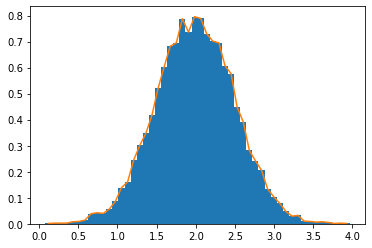

In [5]:
import numpy as np
rg = np.random.default_rng(1)
import matplotlib.pyplot as plt
# 构建一个方差为0.5^2，均值为2的10000个正态偏差向量
mu, sigma = 2, 0.5
v = rg.normal(mu,sigma,10000)
# Plot a normalized histogram with 50 bins
plt.hist(v, bins=50, density=1)       # matplotlib version (plot)
# Compute the histogram with numpy and then plot it
(n, bins) = np.histogram(v, bins=50, density=True)  # NumPy version (no plot)
plt.plot(.5*(bins[1:]+bins[:-1]), n)

In [2]:
bins

array([0.08106893, 0.15876533, 0.23646173, 0.31415813, 0.39185453,
       0.46955093, 0.54724733, 0.62494373, 0.70264013, 0.78033653,
       0.85803293, 0.93572933, 1.01342573, 1.09112213, 1.16881853,
       1.24651493, 1.32421133, 1.40190773, 1.47960413, 1.55730053,
       1.63499693, 1.71269333, 1.79038973, 1.86808613, 1.94578253,
       2.02347893, 2.10117533, 2.17887173, 2.25656814, 2.33426454,
       2.41196094, 2.48965734, 2.56735374, 2.64505014, 2.72274654,
       2.80044294, 2.87813934, 2.95583574, 3.03353214, 3.11122854,
       3.18892494, 3.26662134, 3.34431774, 3.42201414, 3.49971054,
       3.57740694, 3.65510334, 3.73279974, 3.81049614, 3.88819254,
       3.96588894])

In [3]:
n

array([0.00128706, 0.00257412, 0.00257412, 0.00257412, 0.00772237,
       0.00900943, 0.01415767, 0.03861183, 0.04247301, 0.03989889,
       0.05663068, 0.08623308, 0.13900258, 0.16088261, 0.24454157,
       0.30117225, 0.34750645, 0.41700774, 0.51997261, 0.60234451,
       0.68214229, 0.69501289, 0.78768128, 0.73619884, 0.79540365,
       0.78896834, 0.72976354, 0.7014482 , 0.69501289, 0.60749275,
       0.57660329, 0.4478972 , 0.39126652, 0.28186634, 0.24196745,
       0.20592975, 0.13385434, 0.10425193, 0.07851072, 0.04762125,
       0.0296024 , 0.03217652, 0.01029649, 0.00900943, 0.0064353 ,
       0.00772237, 0.00514824, 0.00128706, 0.00257412, 0.00128706])